# Conversion Rate Project ~~ Uma Rajagopalan

#### Every code begins with some import statements

In [1]:
#Import statements:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#For Random Forest - Prediction
from sklearn.ensemble import RandomForestClassifier

#Confusion matrix
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

#Decision Tree - Interpretation
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import cross_val_score

#Partial Dependency plot
from sklearn.inspection import PartialDependenceDisplay

%matplotlib inline

#### Importing the dataset

In [2]:
#Importing the dataset

cd = pd.read_csv("conversion_data.csv")
cd.head()

,country,age,new_user,source,total_pages_visited,converted
0,UK,25,1,Ads,1,0
1,US,23,1,Seo,5,0
2,US,28,1,Seo,4,0
3,China,39,1,Seo,5,0
4,US,30,1,Seo,6,0


#### Some stats about the dataset

In [3]:
#Description of the dataset

print(cd.describe())

                 age       new_user  total_pages_visited      converted
count  316200.000000  316200.000000        316200.000000  316200.000000
mean       30.569858       0.685465             4.872966       0.032258
std         8.271802       0.464331             3.341104       0.176685
min        17.000000       0.000000             1.000000       0.000000
25%        24.000000       0.000000             2.000000       0.000000
50%        30.000000       1.000000             4.000000       0.000000
75%        36.000000       1.000000             7.000000       0.000000
max       123.000000       1.000000            29.000000       1.000000


#### From the describe method:

 Number of rows = 316200
 
 Number of categorical columns = 2 (Country, Source) 
 
 Number of numberical columns = 4 (Age, new_user, total_pages_visited, converted)
 
 #### Y = converted
 #### X = country, age, new_user, source, total_pages_visited

## Step 1: Data cleaning

### Missing values:

In [4]:
# Finding if any missing values exist in the dataset

cd.isnull().sum()

#No missing values in the dataset

country                0
age                    0
new_user               0
source                 0
total_pages_visited    0
converted              0
dtype: int64

#### No missing values

### Step 2: Finding Outliers

In [5]:
#Checking outliers:
#country, new_User,source and converted are categorical variables so let's ignore them
#Age and total_pages_visited need outlier detection 

print("Outlier information with Inter Quartile range: (For age, total_pages_visited)")

#Let's check the IQR scores of age:
Q1_age = np.percentile(cd.age, 25)  #This is the 1st quartile
Q3_age = np.percentile(cd.age, 75)  #This is the 3rd quartile
IQR_age = Q3_age - Q1_age   #This is IQR

print("Age: Q1: %f, Q3: %f, IQR: %f " %(Q1_age, Q3_age, IQR_age))

#Let's check the IQR scores of total_pages_visited:
Q1_total_pages_visited = np.percentile(cd.total_pages_visited, 25)  #This is the 1st quartile
Q3_total_pages_visited = np.percentile(cd.total_pages_visited, 75)  #This is the 3rd quartile
IQR_total_pages_visited = Q3_total_pages_visited - Q1_total_pages_visited   #This is IQR

print("total_pages_visited: Q1: %f, Q3: %f, IQR: %f " %( Q1_total_pages_visited, Q3_total_pages_visited, IQR_total_pages_visited))


Outlier information with Inter Quartile range: (For age, total_pages_visited)
Age: Q1: 24.000000, Q3: 36.000000, IQR: 12.000000 
total_pages_visited: Q1: 2.000000, Q3: 7.000000, IQR: 5.000000 


#### Skewness of the data distribution:

Coefficient of Skewness measures how skewed is your distribution. 

If this value is significantly more than zero, then your distribution is skewed to the right - positively skewed. 

If this coefficient is close to zero, then you'll have a relatively symmetric distribution. 

Values which are significantly less than zero are skewed to the left or are negatively skewed.

In [6]:
#Checking skewness:

print("Age skew coefficient: ",cd.age.skew())
print("total_pages_visited skew coefficient: ",cd.age.skew())


Age skew coefficient:  0.5193216964461843
total_pages_visited skew coefficient:  0.5193216964461843


Both are right - positively skewed.

#### Boxplots to look at the outliers

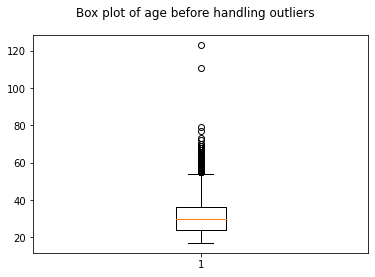

In [7]:
#Boxplot to look at outliers in age
plt.boxplot(cd['age'])
plt.suptitle('Box plot of age before handling outliers')
plt.show()

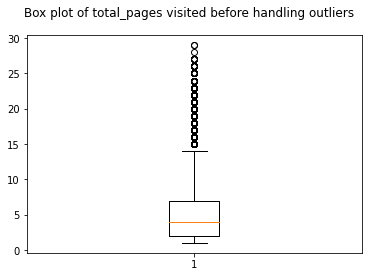

In [8]:
#Boxplot to look at outliers in total_pages)visited

plt.boxplot(cd['total_pages_visited'])
plt.suptitle('Box plot of total_pages visited before handling outliers')

plt.show()

### Step 3: Handling Outliers

#### Method used: Flooring and capping

The outlier is capped at a certain value above the 90th percentile value

or 

floored at a factor below the 10th percentile value.

In [9]:
#flooring (10th percentile) for the lower values and capping (the 90th percentile) for the higher values
print("Age 10th percentile: ",cd['age'].quantile(0.10))
print("Age 90th percentile: ",cd['age'].quantile(0.90))
print("total_pages_visited 10th percentile: ",cd['total_pages_visited'].quantile(0.10))
print("total_pages_visited 90th percentile: ",cd['total_pages_visited'].quantile(0.90))

Age 10th percentile:  20.0
Age 90th percentile:  42.0
total_pages_visited 10th percentile:  1.0
total_pages_visited 90th percentile:  9.0


In [10]:
#Conditions to floor, cap age outliers
cd["age"] = np.where(cd["age"] <20.0, 20.0,cd['age'])
cd["age"] = np.where(cd["age"] >42.0, 42.0,cd['age'])

#Conditions to floor, cap total_pages_visited outliers
cd["total_pages_visited"] = np.where(cd["total_pages_visited"] <1.0, 1.0,cd['total_pages_visited'])
cd["total_pages_visited"] = np.where(cd["total_pages_visited"] >9.0, 9.0,cd['total_pages_visited'])

In [11]:
#Re-Checking skewness:

print("Age skew coefficient: ",cd.age.skew())
print("total_pages_visited skew coefficient: ",cd.age.skew())


Age skew coefficient:  0.1700707164305377
total_pages_visited skew coefficient:  0.1700707164305377


Both age and total_pages_visited are still right positively skewed but the skewness coefficient is much lesser and closer to 0 which means:
    
It is a relatively symmetric distribution

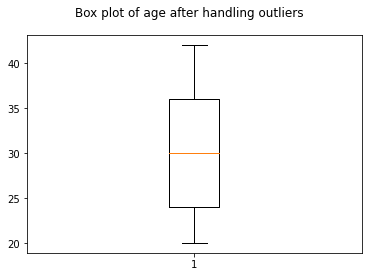

In [12]:
#Boxplot to look at outliers in age after handling outliers
plt.suptitle('Box plot of age after handling outliers')
plt.boxplot(cd['age'])
plt.show()

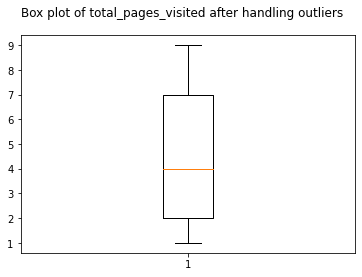

In [13]:
#Boxplot to look at outliers in total_pages_visited after handling outliers
plt.suptitle('Box plot of total_pages_visited after handling outliers')
plt.boxplot(cd['total_pages_visited'])
plt.show()

In [14]:
#Description of the dataset after handling outliers

print(cd.describe())

                 age       new_user  total_pages_visited      converted
count  316200.000000  316200.000000        316200.000000  316200.000000
mean       30.280816       0.685465             4.567030       0.032258
std         7.136400       0.464331             2.584354       0.176685
min        20.000000       0.000000             1.000000       0.000000
25%        24.000000       0.000000             2.000000       0.000000
50%        30.000000       1.000000             4.000000       0.000000
75%        36.000000       1.000000             7.000000       0.000000
max        42.000000       1.000000             9.000000       1.000000


#### Number of rows remains the same. Maximum and minimum values have changed

### Step 4: EDA

#### Initial conversion rate

In [15]:
conversion_rate = cd.converted.sum() / cd.shape[0]
print('Number of customers converted is: %i out of %i' % (cd.converted.sum(), cd.shape[0]))
print("Initial Conversion rate is:",round(conversion_rate*100, 2), "%")

Number of customers converted is: 10200 out of 316200
Initial Conversion rate is: 3.23 %


#### EDA Starts here:

#### i. Conversion rate by age


In [16]:
#Conversion rate by age

conversion_rate_by_age = cd.groupby(by='age')['converted'].sum() / cd.groupby(by='age')['converted'].count() * 100.0

pd.DataFrame(conversion_rate_by_age.reset_index().rename(columns={'converted':'conversion_%'})).head()

,age,conversion_%
0,20.0,6.272492
1,21.0,5.398504
2,22.0,5.324331
3,23.0,4.798962
4,24.0,4.544753


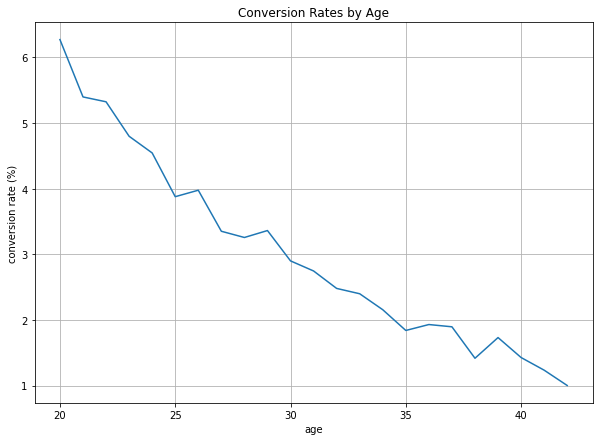

In [17]:
ax = conversion_rate_by_age.plot(
    grid=True,
    figsize=(10, 7),
    title='Conversion Rates by Age')

ax.set_xlabel('age')
ax.set_ylabel('conversion rate (%)')

plt.show()

#### There is a downward trending line between conversion rate and age

#### Conversion rate by age grouped:

In [18]:
# Creating a new column in the dataset for age_group:

def age_group_function(cd):

    if (cd['age'] > 40):
        return '>40'
    
    elif (cd['age'] <= 40) and (cd['age'] > 30):
        return '[31, 40]'
    
    elif (cd['age'] <= 30) and (cd['age'] > 20):
        return '[21, 30]'
    
    elif (cd['age'] <= 20):
        return '<=20'    
    
cd['age_group'] = cd.apply(age_group_function, axis = 1)
cd.head()

,country,age,new_user,source,total_pages_visited,converted,age_group
0,UK,25.0,1,Ads,1.0,0,"[21, 30]"
1,US,23.0,1,Seo,5.0,0,"[21, 30]"
2,US,28.0,1,Seo,4.0,0,"[21, 30]"
3,China,39.0,1,Seo,5.0,0,"[31, 40]"
4,US,30.0,1,Seo,6.0,0,"[21, 30]"


In [19]:
#Conversion rate by age_group
conversion_rate_by_age_group = cd.groupby(by='age_group')['converted'].sum() / cd.groupby(by='age_group')['converted'].count() * 100.0
pd.DataFrame(conversion_rate_by_age_group.reset_index().rename(columns={'converted':'conversion_%'})).head()

,age_group,conversion_%
0,<=20,6.272492
1,>40,1.037924
2,"[21, 30]",4.008830
3,"[31, 40]",2.078157


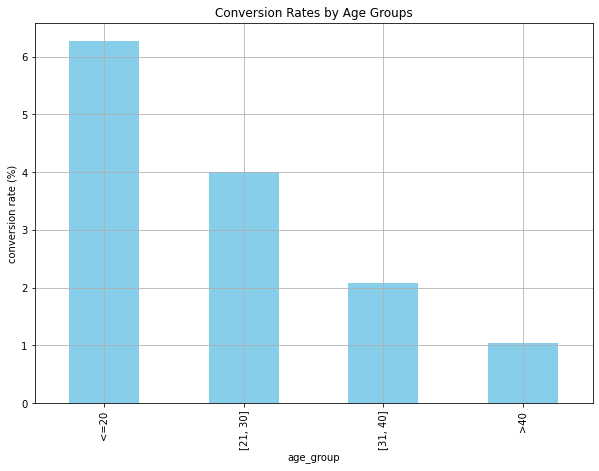

In [20]:
ax = conversion_rate_by_age_group.loc[['<=20', '[21, 30]', '[31, 40]', '>40']].plot(
    kind='bar',
    color='skyblue',
    grid=True,
    figsize=(10, 7),
    title='Conversion Rates by Age Groups')

ax.set_xlabel('age_group')
ax.set_ylabel('conversion rate (%)')

plt.show()

#### ii. Conversion rates by country

In [21]:
# Conversion rates by country


conversions_by_country = cd.pivot_table(index='country', columns='converted',
                    aggfunc={'converted':len})
conversions_by_country

converted      
converted         0     1
country                  
China         76500   102
Germany       12240   816
UK            45900  2550
US           171360  6732

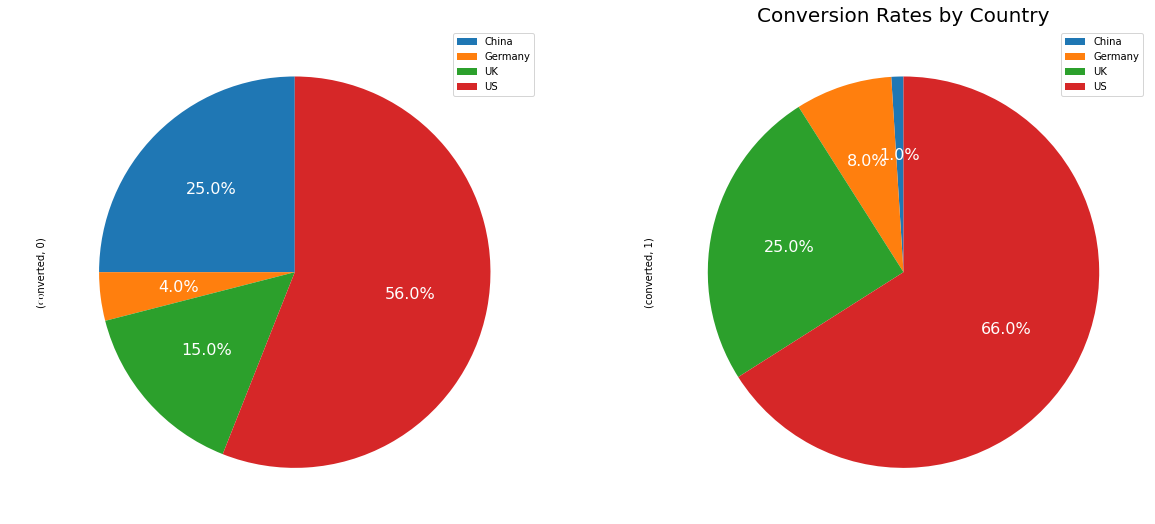

In [22]:
#Pie chart for conversion rate by country
conversions_by_country.plot(
    kind='pie',
    textprops={'fontsize': 16
               ,'color': 'white'
              },
    figsize=(20, 9),
    startangle=90,
    subplots=True,
    #title='Conversion Rates by Country',
    autopct=lambda x: '%0.1f%%' % x)

plt.title('Conversion Rates by Country',fontsize=20,loc = 'center')

plt.show()

Conversion rates are higher in USA than other countries. China has the lowest

#### iii. Conversion rate by source

In [23]:
#Conversion rate by source
conversions_by_source = cd.pivot_table(index='source', columns='converted',
                    aggfunc={'converted':len})
conversions_by_source

converted      
converted         0     1
source                   
Ads           85680  3060
Direct        70380  2040
Seo          149940  5100

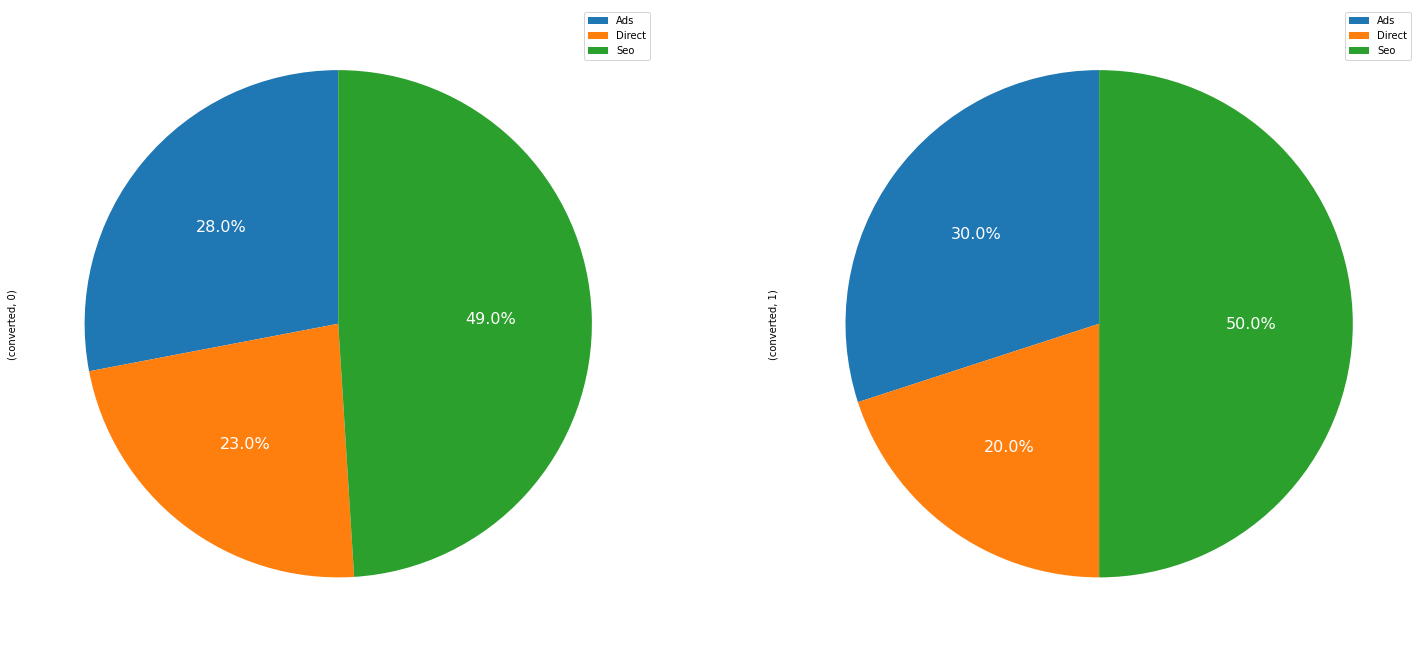

In [24]:
#Pie chart for conversion rate by source
conversions_by_source.plot(
    kind='pie',
    textprops={'fontsize': 16
               ,'color': 'white'
              },
    figsize=(25, 12),
    startangle=90,
    subplots=True,
    autopct=lambda x: '%0.1f%%' % x)

plt.show()

Seo has more reach on conversion rate than other sources

#### iv. Conversion rate by age_group and country

In [25]:
#Grouping age and country
age_country = cd.groupby(['age_group', 'country'])['converted'].sum().unstack('country').fillna(0)
age_country

country,China,Germany,UK,US
age_group,,,,
<=20,21,191,572,1447
>40,3,30,101,282
"[21, 30]",60,409,1333,3501
"[31, 40]",18,186,544,1502


In [26]:

age_country = age_country.divide(
    cd.groupby(
    by='age_group'
    )['converted'].count(), 
    axis=0)

age_country

country,China,Germany,UK,US
age_group,,,,
<=20,0.000590,0.005370,0.016082,0.040683
>40,0.000075,0.000749,0.002520,0.007036
"[21, 30]",0.000454,0.003092,0.010077,0.026466
"[31, 40]",0.000166,0.001718,0.005025,0.013873


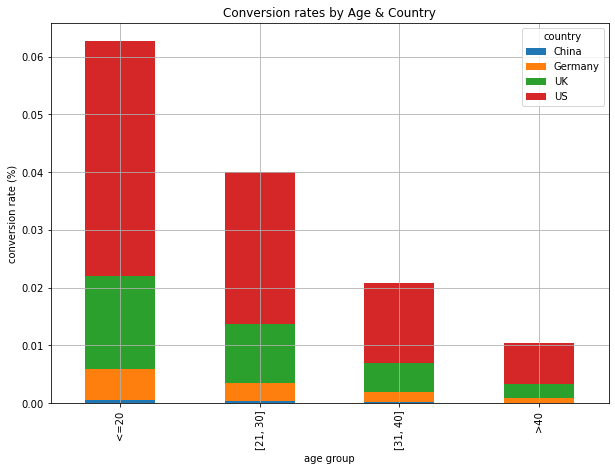

In [27]:
ax = age_country.loc[
    ['<=20', '[21, 30]', '[31, 40]', '>40']].plot(
    kind='bar', 
    stacked=True,
    grid=True,
    figsize=(10,7))

ax.set_title('Conversion rates by Age & Country')
ax.set_xlabel('age group')
ax.set_ylabel('conversion rate (%)')

plt.show()

Conversion rate for age <=20 and country USA is highest. Lowest conversion rate is for China >40 years of age

#### v.Conversion rate by age_group and source

In [28]:
age_source = cd.groupby(['age_group', 'source'])['converted'].sum().unstack('source').fillna(0)
age_source

source,Ads,Direct,Seo
age_group,,,
<=20,669,426,1136
>40,126,80,210
"[21, 30]",1587,1068,2648
"[31, 40]",678,466,1106


In [29]:
age_source = age_source.divide(
    cd.groupby(
    by='age_group'
    )['converted'].count(), 
    axis=0)

age_source

source,Ads,Direct,Seo
age_group,,,
<=20,0.018809,0.011977,0.031939
>40,0.003144,0.001996,0.005240
"[21, 30]",0.011997,0.008074,0.020018
"[31, 40]",0.006262,0.004304,0.010215


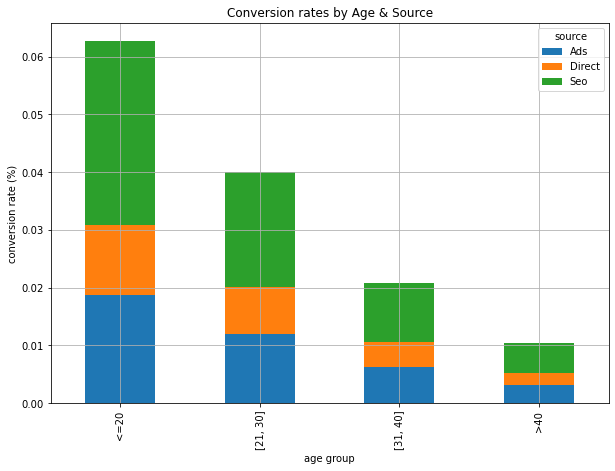

In [30]:
ax = age_source.loc[
    ['<=20', '[21, 30]', '[31, 40]', '>40']].plot(
    kind='bar', 
    stacked=True,
    grid=True,
    figsize=(10,7))

ax.set_title('Conversion rates by Age & Source')
ax.set_xlabel('age group')
ax.set_ylabel('conversion rate (%)')

plt.show()

Conversion rate for Seo with age <=20 is greatest whereas it is the lowest for Direct source and age > 40

#### vi. New user vs conversion rate

In [31]:
# Conversion rates by new_user


conversions_by_new_user = cd.pivot_table(index='new_user', columns='converted',
                    aggfunc={'converted':len})
conversions_by_new_user

converted      
converted         0     1
new_user                 
0             92295  7161
1            213705  3039

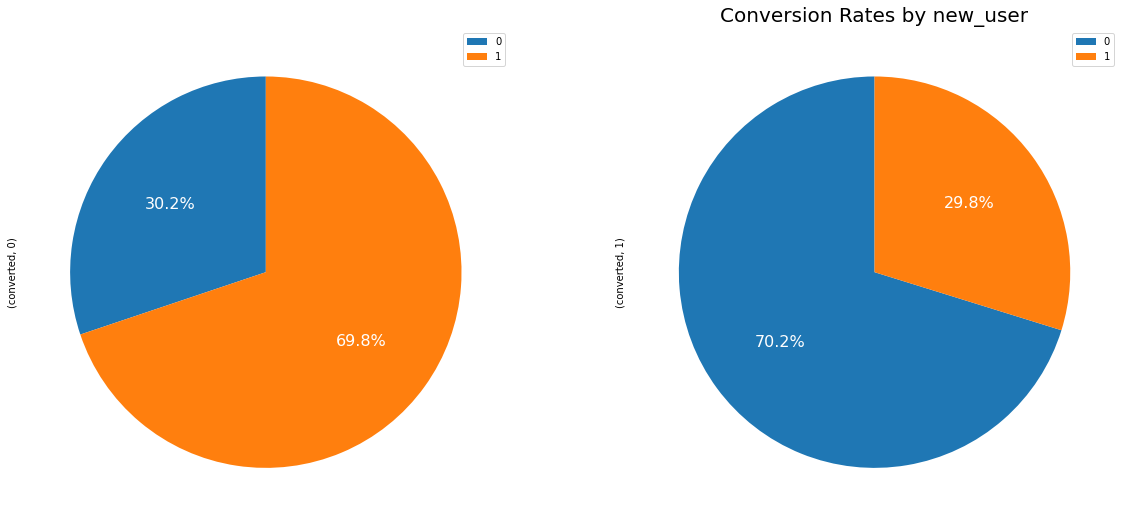

In [32]:
#Pie chart for conversion rate by new_user
conversions_by_new_user.plot(
    kind='pie',
    textprops={'fontsize': 16
               ,'color': 'white'
              },
    figsize=(20, 9),
    startangle=90,
    subplots=True,
    #title='Conversion Rates by new_user',
    autopct=lambda x: '%0.1f%%' % x)

plt.title('Conversion Rates by new_user',fontsize=20,loc = 'center')

plt.show()

Higher conversion rate for people who already have an account

New users have visited the website a lot but have not converted

#### vii. Conversion rate by total_pages_visited

In [33]:
#Conversion rate by total_pages_visited

conversion_rate_by_total_pages_visited = cd.groupby(by='total_pages_visited')['converted'].sum() / cd.groupby(by='total_pages_visited')['converted'].count() * 100.0

pd.DataFrame(conversion_rate_by_total_pages_visited.reset_index().rename(columns={'converted':'conversion_%'})).head()

,total_pages_visited,conversion_%
0,1.0,0.000000
1,2.0,0.022796
2,3.0,0.025098
3,4.0,0.077961
4,5.0,0.156990


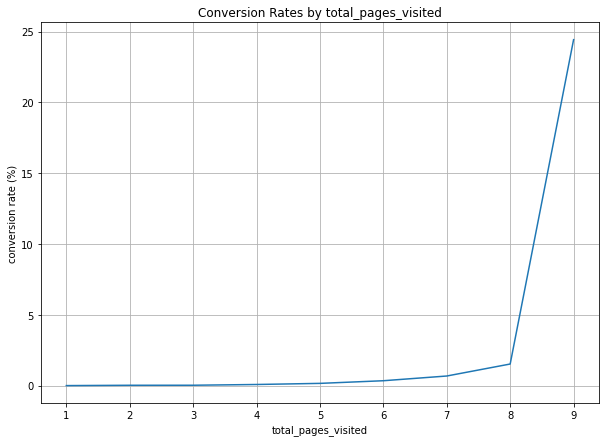

In [34]:
ax = conversion_rate_by_total_pages_visited.plot(
    grid=True,
    figsize=(10, 7),
    title='Conversion Rates by total_pages_visited')

ax.set_xlabel('total_pages_visited')
ax.set_ylabel('conversion rate (%)')

plt.show()

Most conversion rates seem to be from people who have visited more number of pages

#### viii. Correlation:

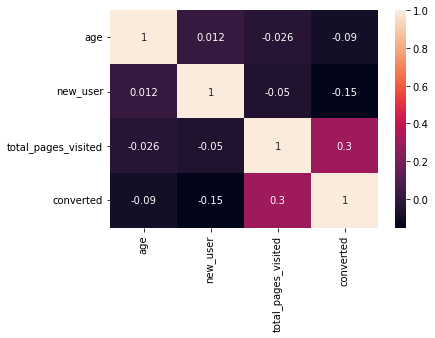

In [35]:
#Let's check correlation
corrMatrix = cd.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

#Ignoring converted and new_user. Very less correlation among age and total_pages_visited

#### Not much correlation among variables which is a good thing

### Step 5: Creating Dummy Variables for Categorical columns: Country, Ads

In [36]:
#Let's Create Dummy Variables

#For Country:

CountryDummy = pd.get_dummies(cd.country)
#CountryDummy
del CountryDummy['China']
cd = pd.concat([cd,CountryDummy],axis = 1)

#For Source:

SourceDummy = pd.get_dummies(cd.source)
#del SourceDummy['Ads']
cd = pd.concat([cd,SourceDummy],axis = 1)

del cd['age_group']


cd.head()

,country,age,new_user,source,total_pages_visited,converted,Germany,UK,US,Ads,Direct,Seo
0,UK,25.0,1,Ads,1.0,0,0,1,0,1,0,0
1,US,23.0,1,Seo,5.0,0,0,0,1,0,0,1
2,US,28.0,1,Seo,4.0,0,0,0,1,0,0,1
3,China,39.0,1,Seo,5.0,0,0,0,0,0,0,1
4,US,30.0,1,Seo,6.0,0,0,0,1,0,0,1


## Question 1: Predict Conversion Rate

#### Assinging X and Y variables:

In [37]:
y = cd['converted']
X =  cd[['new_user','age','total_pages_visited','Germany','UK','US','Direct','Seo']]


#### Splitting the data into test and train:

In [38]:
# implementing train-test-split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=66)

#### Using Random Forest Classifier to predict coversion rate

#### To find the best max features 


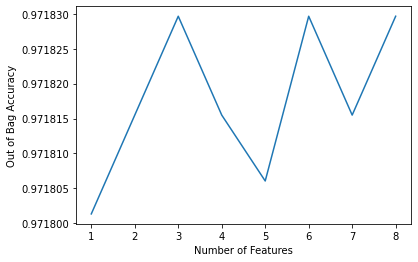

In [39]:
Features = range(1,9)
oob_score_RF = []
for i in Features:
        RFClass = RandomForestClassifier(n_estimators = 500, #Number of trees
                           max_features = i,     #How many features to randomly choose in each node 
                           min_samples_leaf = 5, #Minimum number of observations at each terminal node
                           oob_score = True,
                           random_state = 24,
                           n_jobs = -1)
        RFClass.fit(X_train,y_train)  
        oob_score_RF.append(RFClass.oob_score_)

plt.plot(Features, oob_score_RF)
plt.xlabel("Number of Features")
plt.ylabel("Out of Bag Accuracy")
plt.show() 

In [40]:
Best_Max_Features_Random_Forest_Classifier = Features[np.argmax(oob_score_RF)]
print("Best max_features is: ",Best_Max_Features_Random_Forest_Classifier)

Best max_features is:  3


#### Running the Random Forest Classifier on the best max features found

In [41]:
from sklearn.ensemble import RandomForestClassifier

RFClass = RandomForestClassifier(n_estimators = 500, 
                                 max_features = Best_Max_Features_Random_Forest_Classifier,
                                 min_samples_leaf = 5,
                                 oob_score = True,
                                 random_state = 24,
                                 n_jobs = -1)
RFClass.fit(X_train, y_train)
print("Best max_features is: ",Best_Max_Features_Random_Forest_Classifier)
print("Out of Bag Accuracy  = %f " %RFClass.oob_score_)


Best max_features is:  3
Out of Bag Accuracy  = 0.971830 


In [42]:
scores = cross_val_score(RFClass, X_train, y_train, cv = 10)


In [43]:
print("Cross-validation Accuracy = %f" %scores.mean())
Misclassification_Error = 1-scores.mean()
print("Misclassification Error = %f" %Misclassification_Error)

Cross-validation Accuracy = 0.972000
Misclassification Error = 0.028000


#### Predicting the Y values on the test data:

In [44]:
# You can call predict the same way we called predict to any other algorithm we used before
y_hat = RFClass.predict(X_test)
print(y_hat)


[0 0 0 ... 0 0 0]


#### Confusion Matrix to check our results

In [45]:
#Prediction confusion matrix:
print("Results from the Random Forest Classifier:\n")
cf_matrix = confusion_matrix(y_test, y_hat)
cf_matrix

Results from the Random Forest Classifier:



array([[100073,    915],
       [  1984,   1374]], dtype=int64)

In [46]:
TN = cf_matrix[0,0] #True Negative
FN = cf_matrix[1,0] #False Negative
FP = cf_matrix[0,1] #False Positive
TP = cf_matrix[1,1] #True Positive

In [47]:
Err = float(FP + FN)/(FP + FN + TP + TN) #Prediction Error
Acc = float(TP + TN)/(FP + FN + TP + TN) #Prediction Accuracy
FPR = float(FP)/(FP + TN)  #False Positive Rate
TNR = float(TN)/(FP + TN)  #True Negative Rate
TPR = float(TP)/(FN + TP)  #True Positive Rate
FNR = float(FN)/(FN + TP)  #False Negative Rate
print("False Positive Rate = %f " %FPR)
print("False Negative Rate = %f " %FNR)
print("True Positive Rate = %f " %TPR)
print("True Negative Rate = %f " %TNR)
print("Misclassification Error = %f " %Err)
print("Accuracy = %f " %Acc)

False Positive Rate = 0.009060 
False Negative Rate = 0.590828 
True Positive Rate = 0.409172 
True Negative Rate = 0.990940 
Misclassification Error = 0.027783 
Accuracy = 0.972217 


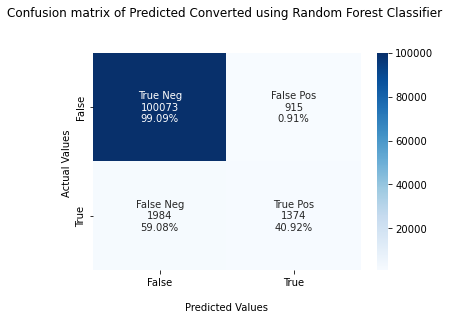

In [48]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
cf_matrix_value = [TNR,FPR,FNR,TPR]

group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix_value]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

ax.set_title('Confusion matrix of Predicted Converted using Random Forest Classifier \n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

#### Question 1 Result:

In [49]:
# Predict the full conversion rate
predicted_conversion_rate = y_hat.sum() / len(y_hat)

# print the final result
print ('Predicted Conversion Rate: {:.2f}%'.format(predicted_conversion_rate * 100))

Predicted Conversion Rate: 2.19%


### Question 2: Come up with recommendations for the product team and the marketing team to improve conversion rate

#### Using Decision Tree Classifier for interpretation

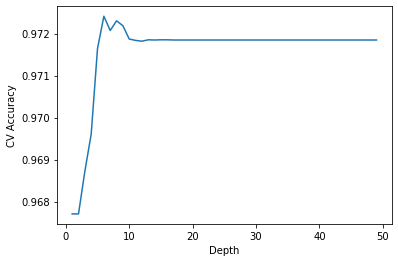

In [50]:
#Tuning max depth for the tree
Maximum_Depth = range(1,50)
score = []
for i in Maximum_Depth:
    TreeClass = DecisionTreeClassifier(max_depth = i, 
                                       min_samples_leaf = 5, 
                                       random_state = 24)
    score.append((cross_val_score(TreeClass, X_train, y_train, cv=10, scoring = 'accuracy')).mean())

plt.plot(Maximum_Depth, score)
plt.xlabel("Depth")
plt.ylabel("CV Accuracy")
plt.show()

In [51]:
CV_MSE_Max = np.argmax(score)
Maximum_Depth = Maximum_Depth[CV_MSE_Max]

print("The best option for maximum depth is %i which results in accuracy = %f" %(Maximum_Depth, np.max(score)))

The best option for maximum depth is 6 which results in accuracy = 0.972415


#### Running the Decision Tree Classifier with the Maximum Depth of the tree:

In [52]:
#Feature Importance
TreeClass = DecisionTreeClassifier(
                max_depth = Maximum_Depth,
                min_samples_leaf = 5,
                random_state = 24)

TreeClass.fit(X_train,y_train)

ImportanceDataFrame1 = pd.DataFrame({'feature':X.columns.values, 'importance':TreeClass.feature_importances_})
ImportanceDataFrame1.sort_values(by = ['importance'], ascending = 0)

,feature,importance
2,total_pages_visited,0.533171
0,new_user,0.235979
1,age,0.087890
3,Germany,0.060780
5,US,0.054935
4,UK,0.026384
6,Direct,0.000855
7,Seo,0.000006


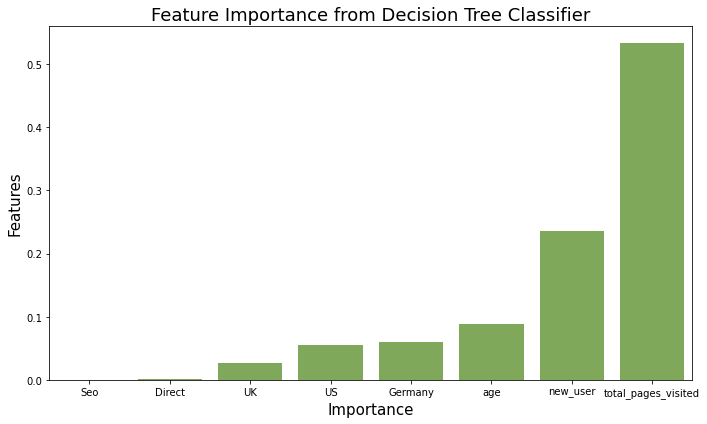

In [53]:
# Display a horizontal barplot with the feature importances
plt.figure(figsize=(10,6))
#df_sorted = df.sort_values('marks')
sns.barplot(y=ImportanceDataFrame1['importance']
            , x=ImportanceDataFrame1['feature'],
            color='#7eb54e', 
           order=ImportanceDataFrame1.sort_values('importance').feature)

plt.xlabel("Importance", size=15)
plt.ylabel("Features", size=15)
plt.title("Feature Importance from Decision Tree Classifier", size=18)
plt.tight_layout()

Total_pages_visited is the most important feature followed by new_user, age, Country, Source

#### Recommendations for the product team:

##### Total_Pages_Visited:
If an user has visited many pages and hasn’t converted yet then we should influence them to convert.The longer the user browses, the more likely he/she will convert and buy something. 

##### New_User:

Older accounts have a better conversion rate. The product team can target the new users with promotional emails and advertising campaigns to improve conversion rates

##### Age:

Younger users have more conversion rate than older users. Steps must be taken to target younger audience more so the conversion rate keeps increasing

##### Country:
    
Users from China have very poor conversion rate. The team must do better to target users from China with more contant and features useful to them. Since China has a large population, the site should try to focus on increasing the number of Chinese visitors


##### Source:
Source is not a good factor as it's importance was very close to 0. No recommendations for source of marketing